In [42]:
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
path_to_age_rules = "Files/InitialAge.csv"
path_to_death_rules = "Files/DeathRules.csv"
start_year = 1990
end_year = 2040
population_count = 130_000_000

men_selebration = False
army = False
death_while_birth = True
dumb_ways_to_die = False


path = "Demographic.Exec/bin/Debug/net8.0/Demographic.Exec.exe"

subprocess.run([path,
                path_to_age_rules,
                path_to_death_rules,
                str(start_year),
                str(end_year),
                str(population_count),
                str(men_selebration),
                str(army),
                str(death_while_birth),
                str(dumb_ways_to_die)],
                capture_output=True, text=True)


CompletedProcess(args=['Demographic.Exec/bin/Debug/net8.0/Demographic.Exec.exe', 'Files/InitialAge.csv', 'Files/DeathRules.csv', '1990', '2040', '130000000', 'False', 'False', 'True', 'False'], returncode=0, stdout='Finished\n', stderr='')

In [44]:
year_by_year = pd.read_csv('Files/Year_by_year_results.csv') 
age_distribution = pd.read_csv('Files/Model_results.csv')

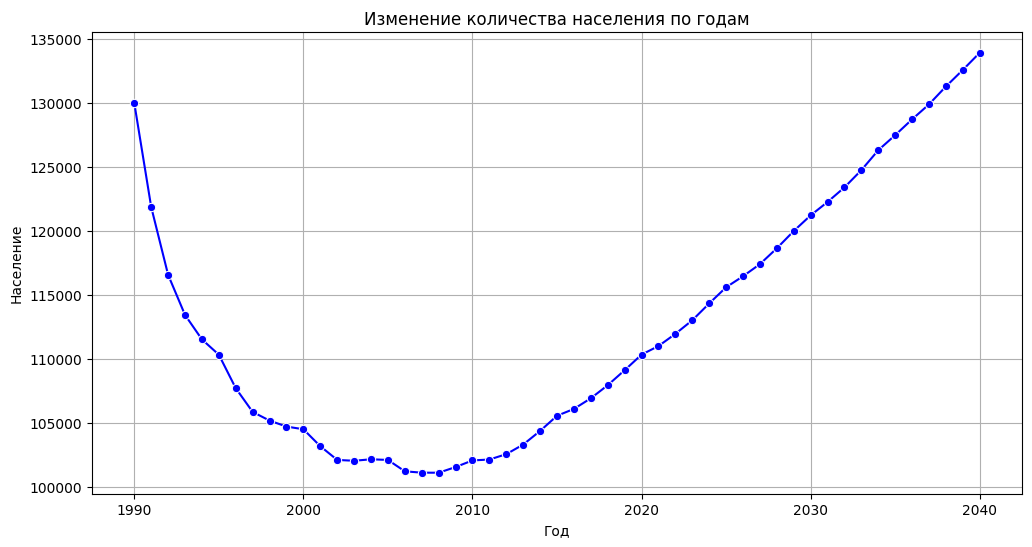

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_by_year, x='year', y='total', marker='o', color='blue')
plt.title('Изменение количества населения по годам')
plt.xlabel('Год')
plt.ylabel('Население')
plt.grid(True)
plt.show()

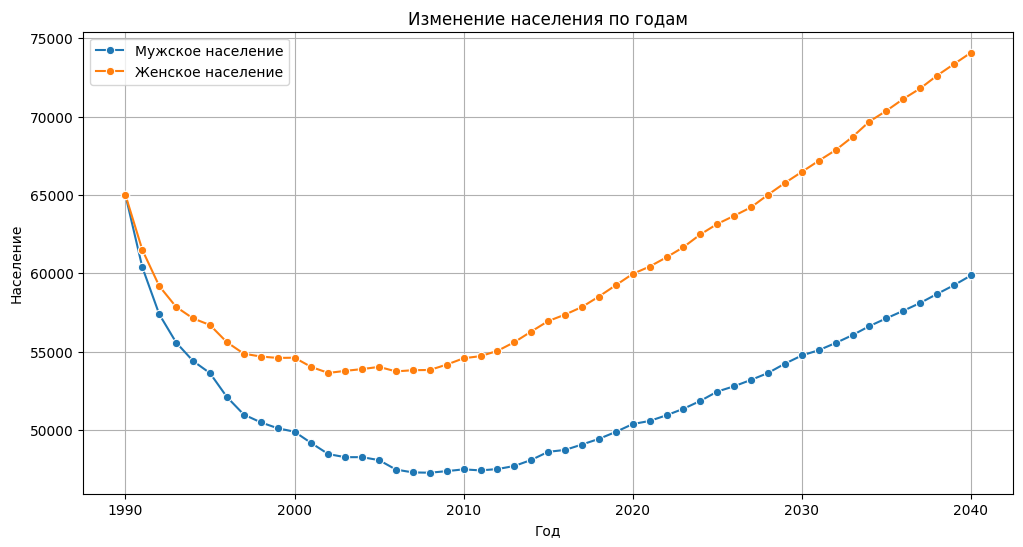

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_by_year, x='year', y='men_count', marker='o', label='Мужское население')
sns.lineplot(data=year_by_year, x='year', y='women_count', marker='o', label='Женское население')
plt.title('Изменение населения по годам')
plt.xlabel('Год')
plt.ylabel('Население')
plt.legend()
plt.grid(True)
plt.show()

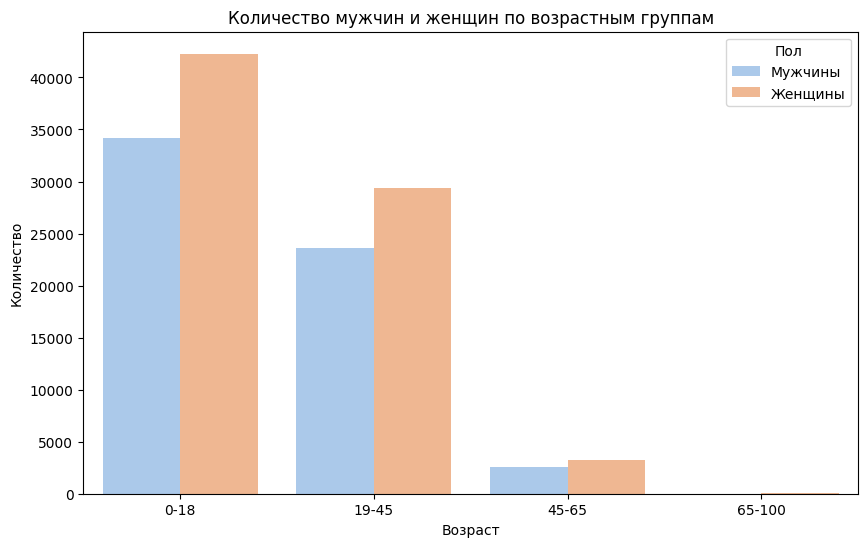

In [47]:
df_melted = age_distribution.melt(id_vars='age', value_vars=['men_count', 'women_count'], 
                    var_name='gender', value_name='count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='age', y='count', hue='gender', data=df_melted, palette='pastel')

# Настройки диаграммы
plt.title('Количество мужчин и женщин по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Количество')

# Получаем ручки и метки легенды
hands, labs = ax.get_legend_handles_labels()

# Устанавливаем легенду с правильными цветами
plt.legend(handles=hands, labels=["Мужчины", "Женщины"], title = "Пол")

plt.show()